In [1]:
# Import the os library to interact with the operating system, like navigating directories.
import os

# Import the Image module from the PIL (Pillow) library for image manipulation.
from PIL import Image

In [2]:
# Define the path to the original dataset provided.
input_dir = "/kaggle/input/pre-process-data/For-pre-process"

# Define the path where the resized images will be saved.
output_dir = "/kaggle/working/resized-data"

# Check if the output directory exists, if not, create it.
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
from PIL import Image

# Function to load and normalize images
def load_and_normalize_images(input_dir, target_size=(150, 150)):
    original_images = []
    normalized_images = []
    original_stats = []
    normalized_stats = []
    
    categories = ['cardboard', 'glass', 'metal', 'paper', 'plastic']
    
    print("Starting image preprocessing...")
    
    for category in categories:
        category_path = os.path.join(input_dir, category)
        
        if not os.path.exists(category_path):
            continue
            
        print(f"Processing category: {category}")
        
        image_files = [f for f in os.listdir(category_path) 
                      if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        
        for img_file in image_files:
            try:
                img_path = os.path.join(category_path, img_file)
                img = Image.open(img_path).convert('RGB')
                img_resized = img.resize(target_size)
                img_array = np.array(img_resized, dtype=np.float32)
                
                original_stats.append({
                    'category': category,
                    'filename': img_file,
                    'min_value': img_array.min(),
                    'max_value': img_array.max(),
                    'mean_value': img_array.mean(),
                    'std_value': img_array.std()
                })
                
                normalized_img = img_array / 255.0
                
                normalized_stats.append({
                    'category': category,
                    'filename': img_file,
                    'min_value': normalized_img.min(),
                    'max_value': normalized_img.max(),
                    'mean_value': normalized_img.mean(),
                    'std_value': normalized_img.std()
                })
                
                original_images.append(img_array)
                normalized_images.append(normalized_img)
                
            except Exception as e:
                print(f"Error processing {img_file}: {str(e)}")
                continue
    
    return np.array(original_images), np.array(normalized_images), original_stats, normalized_stats

# Process your dataset
input_directory = "/kaggle/input/pre-process-data/For-pre-process"
original_images, normalized_images, original_stats, normalized_stats = load_and_normalize_images(input_directory)

# Prepare data for visualizations
orig_df = pd.DataFrame(original_stats)
norm_df = pd.DataFrame(normalized_stats)

original_pixels = original_images.flatten()
normalized_pixels = normalized_images.flatten()

print(f"Processed {len(normalized_images)} images successfully")
print(f"Original images shape: {original_images.shape}")
print("Data preparation completed - ready for visualizations")


Starting image preprocessing...
Processing category: cardboard
Processing category: glass
Processing category: metal
Processing category: paper
Processing category: plastic
Processed 10000 images successfully
Original images shape: (10000, 150, 150, 3)
Data preparation completed - ready for visualizations


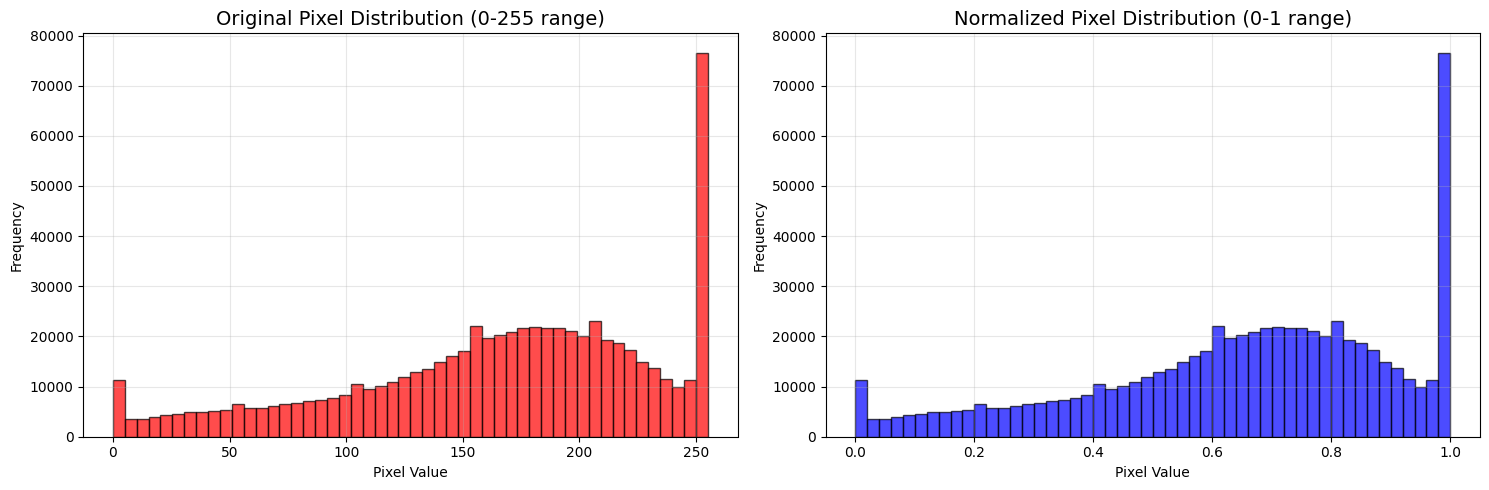

Histogram comparison completed


In [9]:
# Create histogram comparison for pixel distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(original_pixels[::1000], bins=50, alpha=0.7, color='red', edgecolor='black')
plt.title('Original Pixel Distribution (0-255 range)', fontsize=14)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(normalized_pixels[::1000], bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.title('Normalized Pixel Distribution (0-1 range)', fontsize=14)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Histogram comparison completed")


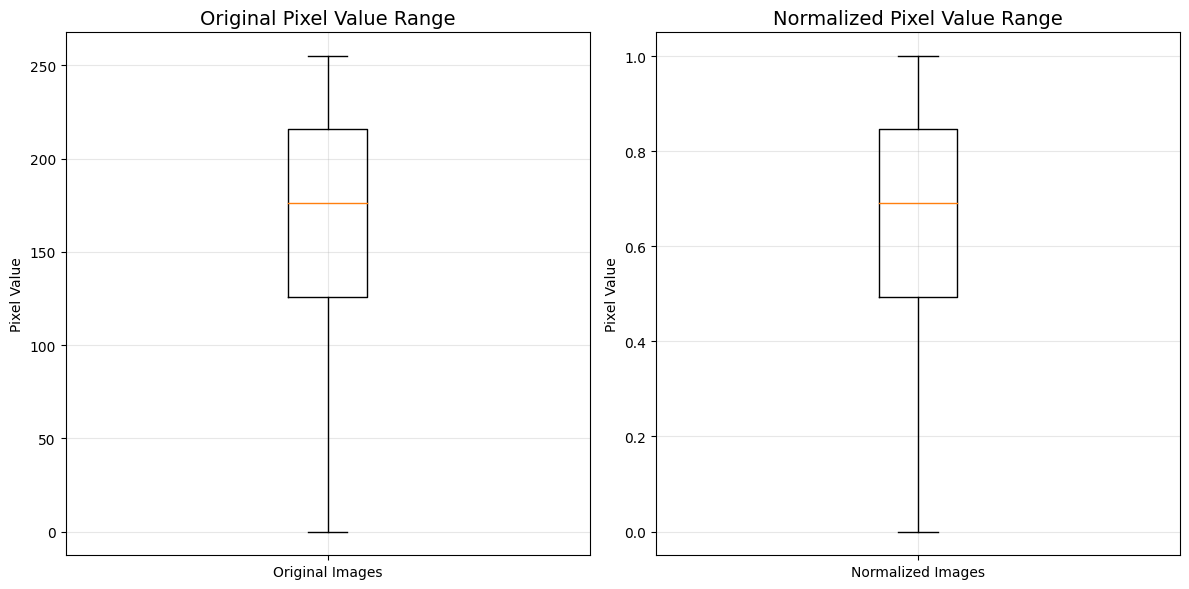

Box plot comparison completed


In [10]:
# Create box plots for pixel value ranges
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
pixel_data_orig = [original_pixels[::5000]]
plt.boxplot(pixel_data_orig, labels=['Original Images'])
plt.title('Original Pixel Value Range', fontsize=14)
plt.ylabel('Pixel Value')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
pixel_data_norm = [normalized_pixels[::5000]]
plt.boxplot(pixel_data_norm, labels=['Normalized Images'])
plt.title('Normalized Pixel Value Range', fontsize=14)
plt.ylabel('Pixel Value')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Box plot comparison completed")


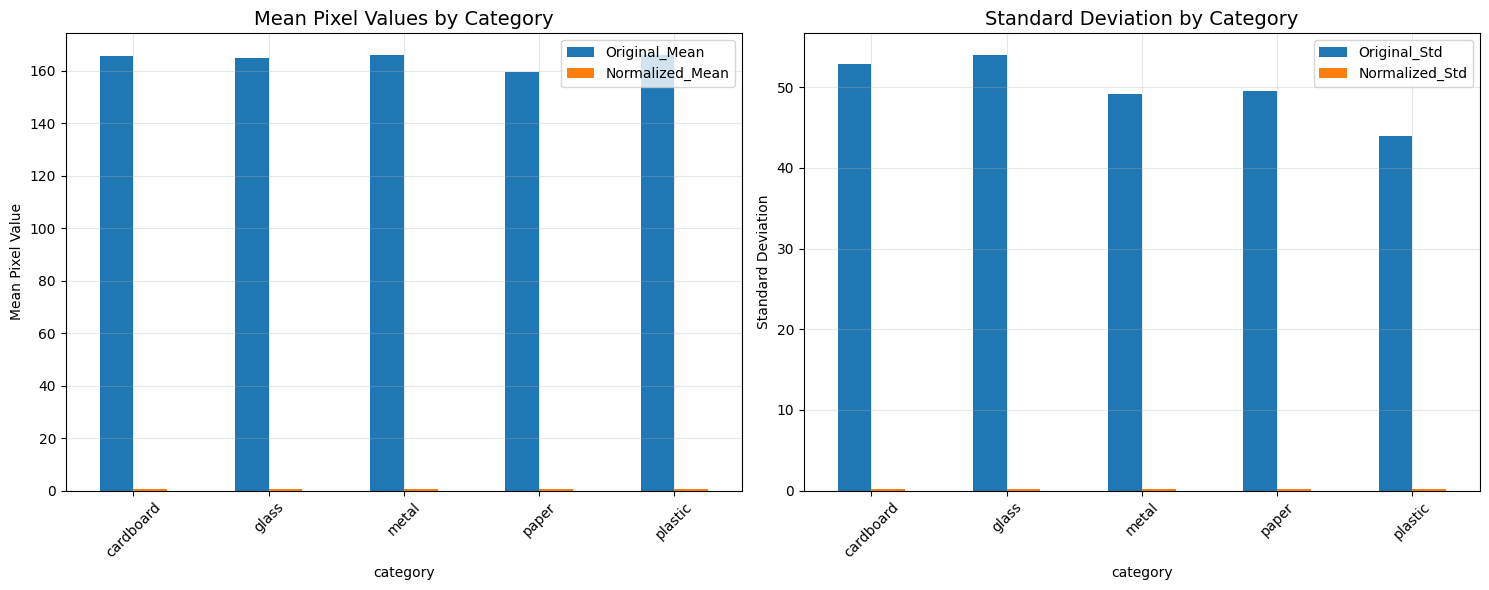

Category-wise comparison completed

Category Statistics:
           Original_Mean  Normalized_Mean  Original_Std  Normalized_Std
category                                                               
cardboard     165.593994            0.649     52.833000           0.207
glass         164.891998            0.647     53.981998           0.212
metal         165.953003            0.651     49.122002           0.193
paper         159.789001            0.627     49.506001           0.194
plastic       166.054001            0.651     43.986000           0.172


In [11]:
# Create category-wise comparison charts
category_comparison = pd.DataFrame({
    'Original_Mean': orig_df.groupby('category')['mean_value'].mean(),
    'Normalized_Mean': norm_df.groupby('category')['mean_value'].mean(),
    'Original_Std': orig_df.groupby('category')['std_value'].mean(),
    'Normalized_Std': norm_df.groupby('category')['std_value'].mean()
})

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
category_comparison[['Original_Mean', 'Normalized_Mean']].plot(kind='bar', ax=plt.gca())
plt.title('Mean Pixel Values by Category', fontsize=14)
plt.ylabel('Mean Pixel Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
category_comparison[['Original_Std', 'Normalized_Std']].plot(kind='bar', ax=plt.gca())
plt.title('Standard Deviation by Category', fontsize=14)
plt.ylabel('Standard Deviation')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Category-wise comparison completed")
print("\nCategory Statistics:")
print(category_comparison.round(3))


In [12]:
# Display comprehensive statistical summary
print("="*60)
print("COMPREHENSIVE STATISTICAL SUMMARY")
print("="*60)

print("\nBEFORE NORMALIZATION:")
print("-" * 30)
print(f"Minimum pixel value: {original_pixels.min():.6f}")
print(f"Maximum pixel value: {original_pixels.max():.6f}")
print(f"Mean pixel value: {original_pixels.mean():.6f}")
print(f"Standard deviation: {original_pixels.std():.6f}")
print(f"Pixel value range: {original_pixels.max() - original_pixels.min():.6f}")

print("\nAFTER NORMALIZATION:")
print("-" * 30)
print(f"Minimum pixel value: {normalized_pixels.min():.6f}")
print(f"Maximum pixel value: {normalized_pixels.max():.6f}")
print(f"Mean pixel value: {normalized_pixels.mean():.6f}")
print(f"Standard deviation: {normalized_pixels.std():.6f}")
print(f"Pixel value range: {normalized_pixels.max() - normalized_pixels.min():.6f}")

print("\nNORMALIZATION VERIFICATION:")
print("-" * 30)
print(f"All pixel values in 0-1 range: {(normalized_pixels >= 0).all() and (normalized_pixels <= 1).all()}")
print(f"Total number of pixels processed: {len(normalized_pixels):,}")
print(f"Total number of images processed: {len(normalized_images)}")

# Category-wise detailed statistics
print("\nCATEGORY-WISE DETAILED STATISTICS:")
print("-" * 30)
for category in orig_df['category'].unique():
    orig_cat_data = orig_df[orig_df['category'] == category]
    norm_cat_data = norm_df[norm_df['category'] == category]
    
    print(f"\n{category.upper()}:")
    print(f"  Images processed: {len(orig_cat_data)}")
    print(f"  Original mean: {orig_cat_data['mean_value'].mean():.3f}")
    print(f"  Normalized mean: {norm_cat_data['mean_value'].mean():.3f}")
    print(f"  Original std: {orig_cat_data['std_value'].mean():.3f}")
    print(f"  Normalized std: {norm_cat_data['std_value'].mean():.3f}")

print("\n" + "="*60)
print("NORMALIZATION PROCESS COMPLETED SUCCESSFULLY!")
print("All pixel values are now in the range [0, 1]")
print("="*60)


COMPREHENSIVE STATISTICAL SUMMARY

BEFORE NORMALIZATION:
------------------------------
Minimum pixel value: 0.000000
Maximum pixel value: 255.000000
Mean pixel value: 164.456177
Standard deviation: 65.915520
Pixel value range: 255.000000

AFTER NORMALIZATION:
------------------------------
Minimum pixel value: 0.000000
Maximum pixel value: 1.000000
Mean pixel value: 0.644926
Standard deviation: 0.258492
Pixel value range: 1.000000

NORMALIZATION VERIFICATION:
------------------------------
All pixel values in 0-1 range: True
Total number of pixels processed: 675,000,000
Total number of images processed: 10000

CATEGORY-WISE DETAILED STATISTICS:
------------------------------

CARDBOARD:
  Images processed: 2000
  Original mean: 165.594
  Normalized mean: 0.649
  Original std: 52.833
  Normalized std: 0.207

GLASS:
  Images processed: 2000
  Original mean: 164.892
  Normalized mean: 0.647
  Original std: 53.982
  Normalized std: 0.212

METAL:
  Images processed: 2000
  Original mean: 1